In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [12]:
df=pd.read_csv('D:/Microsoft Security Prediction/GUIDE_Train.csv')

In [13]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [14]:
df. describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [15]:
df.shape

(9516837, 45)

In [16]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [18]:
df.nunique()

Id                     730778
OrgId                    5769
IncidentId             466151
AlertId               1265644
Timestamp              760944
DetectorId               8428
AlertTitle              86149
Category                   20
MitreTechniques          1193
IncidentGrade               3
ActionGrouped               3
ActionGranular             16
EntityType                 33
EvidenceRole                2
DeviceId                75826
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             358401
AccountUpn             530183
AccountObjectId        343516
AccountName            368250
DeviceName             114541
NetworkMessageId       375196
EmailClusterId          26474
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
ThreatFamily             1745
FileName               222085
FolderPath

In [19]:
df.count()

Id                    9516837
OrgId                 9516837
IncidentId            9516837
AlertId               9516837
Timestamp             9516837
DetectorId            9516837
AlertTitle            9516837
Category              9516837
MitreTechniques       4048451
IncidentGrade         9465497
ActionGrouped           56064
ActionGranular          56064
EntityType            9516837
EvidenceRole          9516837
DeviceId              9516837
Sha256                9516837
IpAddress             9516837
Url                   9516837
AccountSid            9516837
AccountUpn            9516837
AccountObjectId       9516837
AccountName           9516837
DeviceName            9516837
NetworkMessageId      9516837
EmailClusterId          96812
RegistryKey           9516837
RegistryValueName     9516837
RegistryValueData     9516837
ApplicationId         9516837
ApplicationName       9516837
OAuthApplicationId    9516837
ThreatFamily            74881
FileName              9516837
FolderPath

In [24]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
MitreTechniques      5468386
IncidentGrade          51340
ActionGrouped        9460773
ActionGranular       9460773
EmailClusterId       9420025
ThreatFamily         9441956
ResourceType         9509762
Roles                9298686
AntispamDirection    9339535
SuspicionLevel       8072708
LastVerdict          7282572
dtype: int64


In [25]:
# Analyze numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns Analysis:")
print(df[numerical_cols].describe())


Numerical Columns Analysis:
                 Id         OrgId    IncidentId       AlertId    DetectorId  \
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06   
mean   8.425494e+11  1.815800e+02  7.066349e+04  4.065188e+05  1.106724e+02   
std    4.962499e+11  3.867784e+02  1.208369e+05  4.592827e+05  4.351038e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.123169e+11  1.000000e+01  5.040000e+02  2.324200e+04  2.000000e+00   
50%    8.418136e+11  4.500000e+01  1.033600e+04  2.166520e+05  9.000000e+00   
75%    1.271310e+12  1.710000e+02  8.432900e+04  6.715770e+05  4.500000e+01   
max    1.709397e+12  6.147000e+03  5.997060e+05  1.721456e+06  9.522000e+03   

         AlertTitle      DeviceId        Sha256     IpAddress           Url  \
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06   
mean   2.947315e+03  9.566476e+04  1.287191e+05  2.857506e+05  1.503317e+05   
std    1.146150e+04  1

In [22]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [23]:
df.tail()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516836,678604833923,16,141721,644106,2024-06-03T23:51:52.000Z,24,348,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


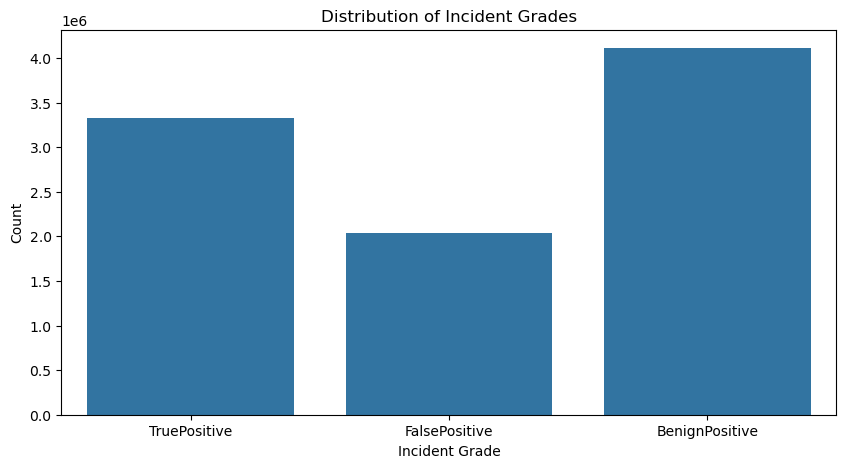

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="IncidentGrade")
plt.title("Distribution of Incident Grades")
plt.xlabel("Incident Grade")
plt.ylabel("Count")
plt.show()

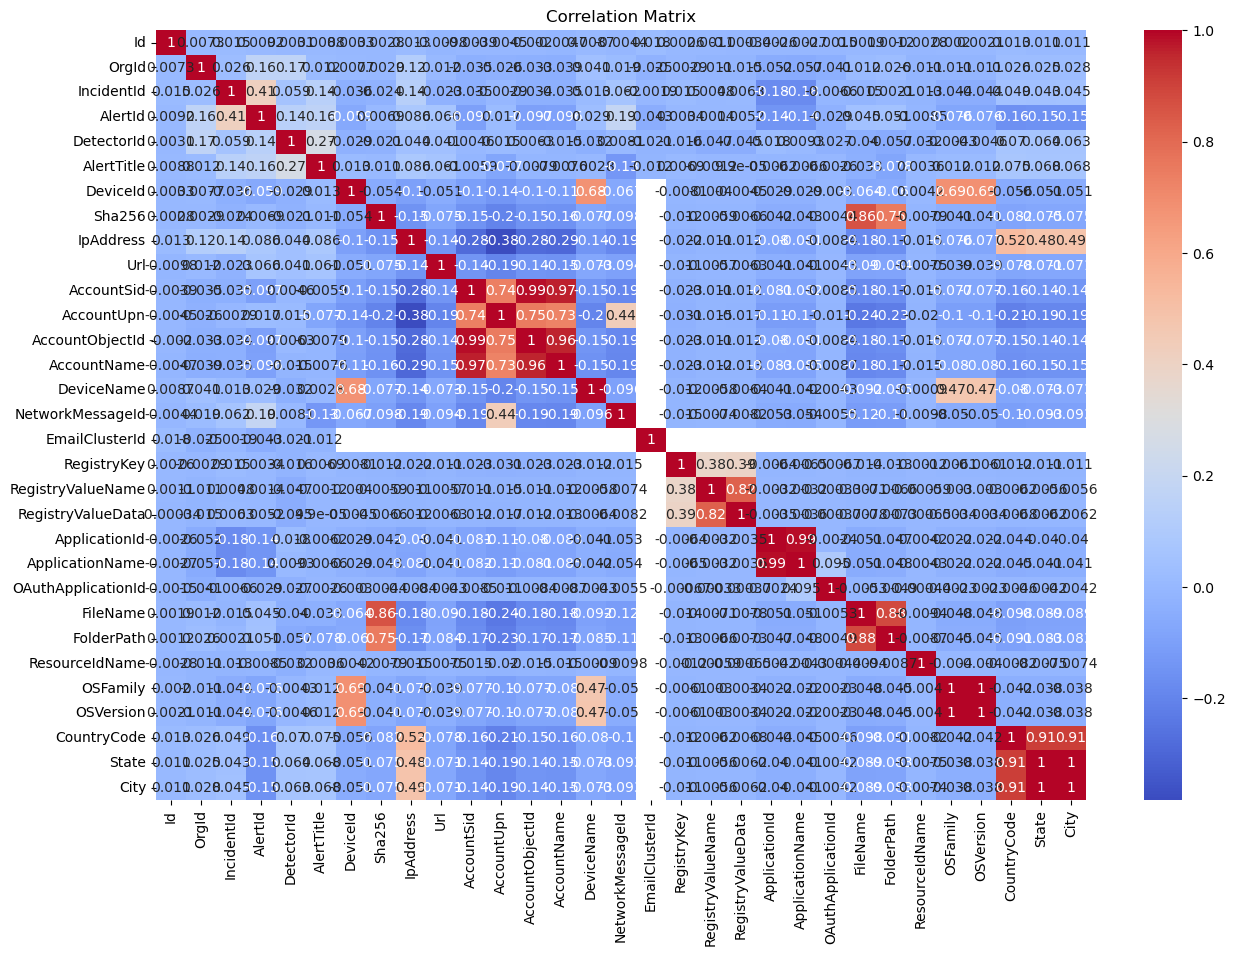

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [28]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# 1. Strongly correlated feature pairs
strong_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("\nHighly Correlated Feature Pairs:")
print(strong_corr)


Highly Correlated Feature Pairs:
                     Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
Id                  1.0    NaN         NaN      NaN         NaN         NaN   
OrgId               NaN    1.0         NaN      NaN         NaN         NaN   
IncidentId          NaN    NaN         1.0      NaN         NaN         NaN   
AlertId             NaN    NaN         NaN      1.0         NaN         NaN   
DetectorId          NaN    NaN         NaN      NaN         1.0         NaN   
AlertTitle          NaN    NaN         NaN      NaN         NaN         1.0   
DeviceId            NaN    NaN         NaN      NaN         NaN         NaN   
Sha256              NaN    NaN         NaN      NaN         NaN         NaN   
IpAddress           NaN    NaN         NaN      NaN         NaN         NaN   
Url                 NaN    NaN         NaN      NaN         NaN         NaN   
AccountSid          NaN    NaN         NaN      NaN         NaN         NaN   
AccountUpn        

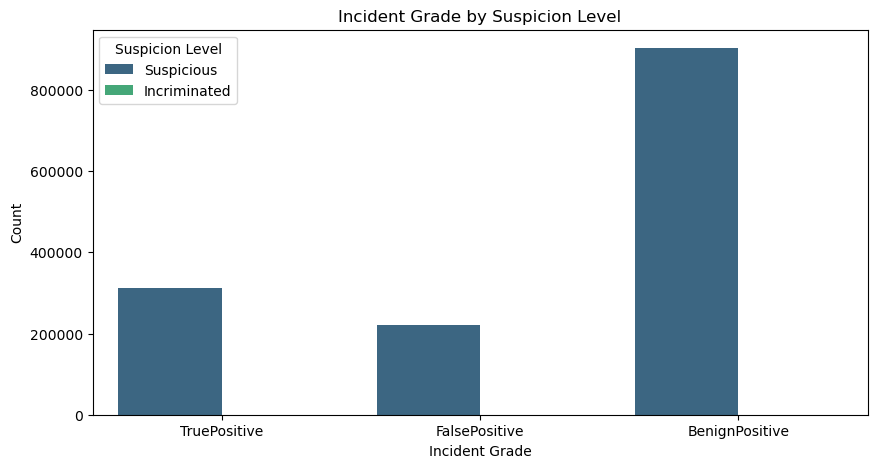

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="IncidentGrade", hue="SuspicionLevel", palette="viridis")
plt.title("Incident Grade by Suspicion Level")
plt.xlabel("Incident Grade")
plt.ylabel("Count")
plt.legend(title="Suspicion Level")
plt.show()


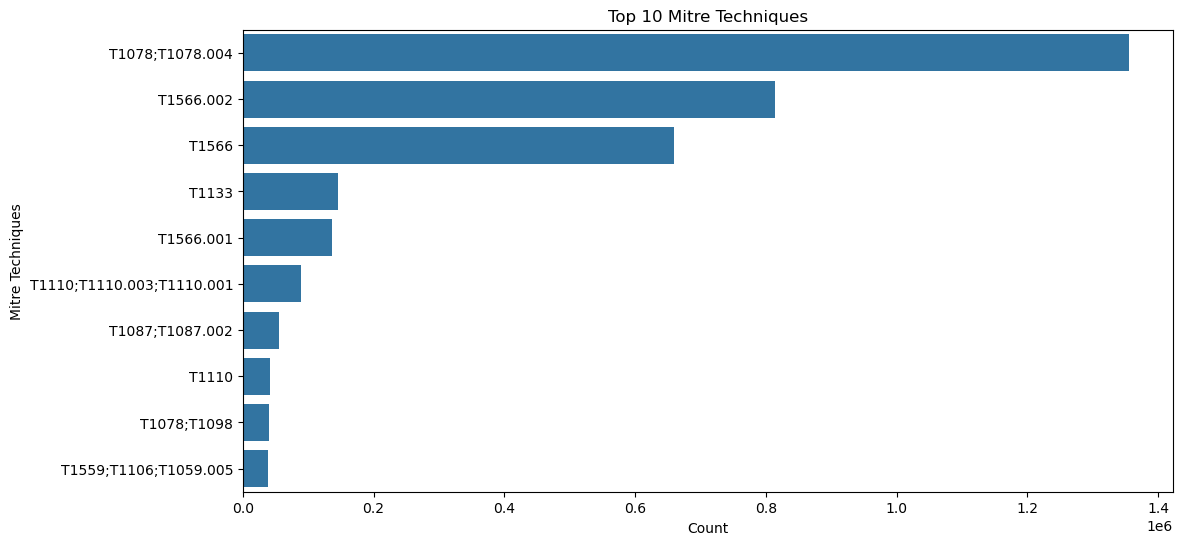

In [30]:
mitre_techniques_counts = df['MitreTechniques'].value_counts()[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=mitre_techniques_counts.values, y=mitre_techniques_counts.index)
plt.title("Top 10 Mitre Techniques")
plt.xlabel("Count")
plt.ylabel("Mitre Techniques")
plt.show()


Frequency of Entity Types:
EntityType
Ip                       2181194
User                     1932416
MailMessage              1173154
Machine                   699208
File                      688402
Url                       682578
CloudLogonRequest         638565
Mailbox                   483158
Process                   345732
MailCluster               224684
CloudApplication          216811
CloudLogonSession         212382
RegistryValue              11209
AzureResource               8166
RegistryKey                 7277
GenericEntity               4294
OAuthApplication            2595
Malware                     2580
SecurityGroup               1518
BlobContainer                306
Blob                         263
MailboxConfiguration         226
Nic                           49
IoTDevice                     31
ActiveDirectoryDomain         11
GoogleCloudResource           10
AmazonResource                 6
Container                      2
KubernetesCluster              2
Cont

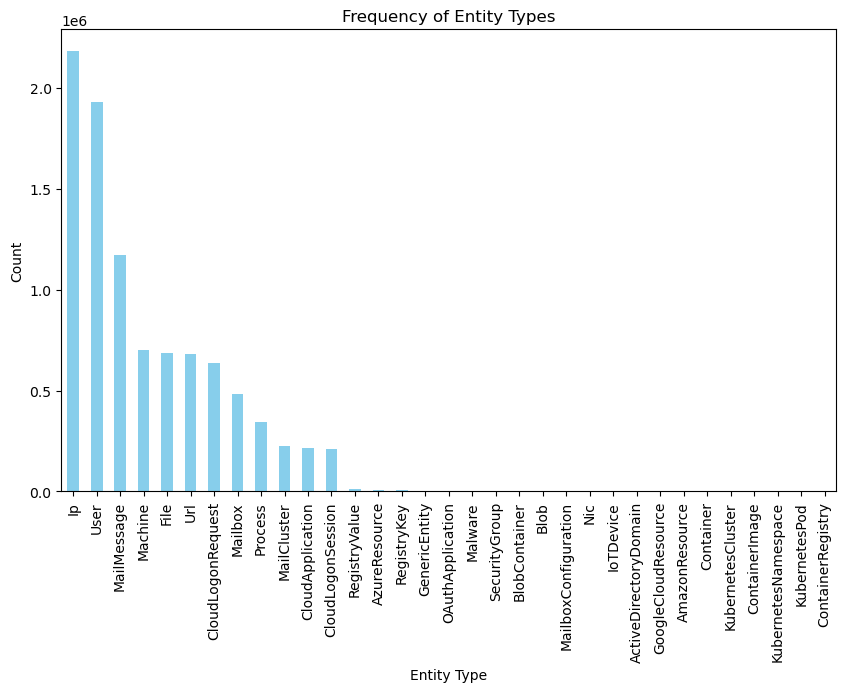

Most Frequent Entity Type: Ip (2181194 occurrences)


In [31]:
# Analyzing the 'EntityType' column
if 'EntityType' in df.columns: 
    entity_type_counts = df['EntityType'].value_counts()
    print("\nFrequency of Entity Types:")
    print(entity_type_counts)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    entity_type_counts.plot(kind='bar', color='skyblue')
    plt.title('Frequency of Entity Types')
    plt.xlabel('Entity Type')
    plt.ylabel('Count')
    plt.show()

    # Insights
    print(f"Most Frequent Entity Type: {entity_type_counts.idxmax()} ({entity_type_counts.max()} occurrences)")


Frequency of Categories:
Category
InitialAccess          4293041
Exfiltration           1577965
SuspiciousActivity     1003933
CommandAndControl       826691
Impact                  750885
CredentialAccess        300518
Execution               267594
Malware                 144081
Discovery               129342
Persistence              72682
DefenseEvasion           46662
LateralMovement          41754
Ransomware               18974
UnwantedSoftware         18211
Collection               14753
PrivilegeEscalation       4671
Exploit                   4648
CredentialStealing         388
WebExploit                  38
Weaponization                6
Name: count, dtype: int64


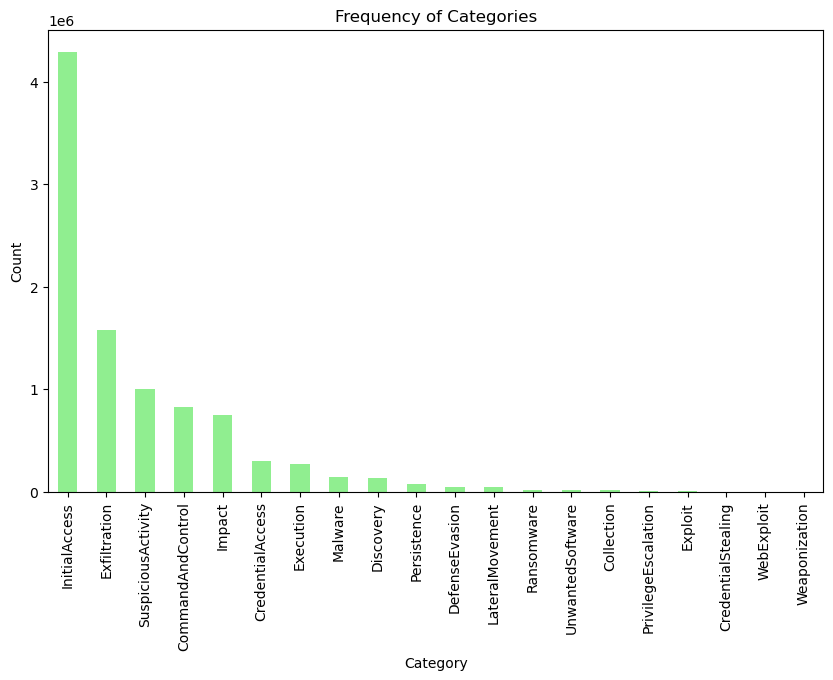

In [32]:
# Visualizing the distribution of Category
if 'Category' in df.columns:
    category_counts = df['Category'].value_counts()
    print("\nFrequency of Categories:")
    print(category_counts)

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='lightgreen')
    plt.title('Frequency of Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()



Frequency of Action Grouped:
ActionGrouped
ContainAccount           53760
IsolateDevice             2237
Stop Virtual Machines       67
Name: count, dtype: int64


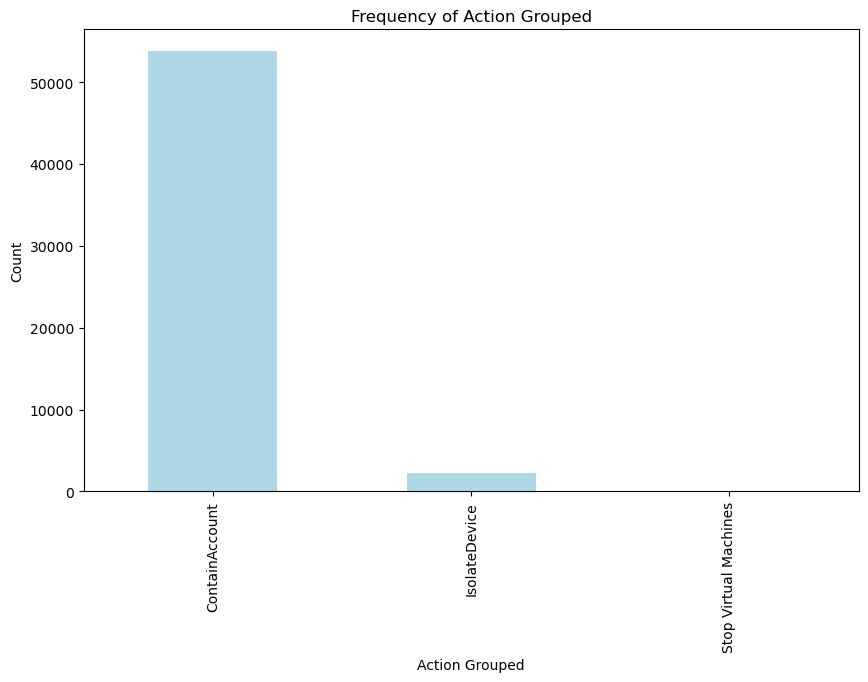

In [33]:
# Analyzing the 'ActionGrouped' column
if 'ActionGrouped' in df.columns:
    action_grouped_counts = df['ActionGrouped'].value_counts()
    print("\nFrequency of Action Grouped:")
    print(action_grouped_counts)

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    action_grouped_counts.plot(kind='bar', color='lightblue')
    plt.title('Frequency of Action Grouped')
    plt.xlabel('Action Grouped')
    plt.ylabel('Count')
    plt.show()

<Figure size 1200x600 with 0 Axes>

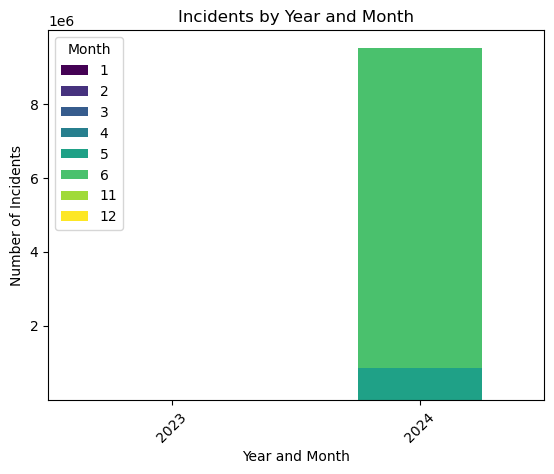

In [34]:
# Convert Timestamp to datetime if not already done
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year, Month, Day, Hour, and Minute from Timestamp
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

# Analyze incidents by Year and Month
incident_by_year_month = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot incidents by Year and Month
plt.figure(figsize=(12, 6))
incident_by_year_month.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Incidents by Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

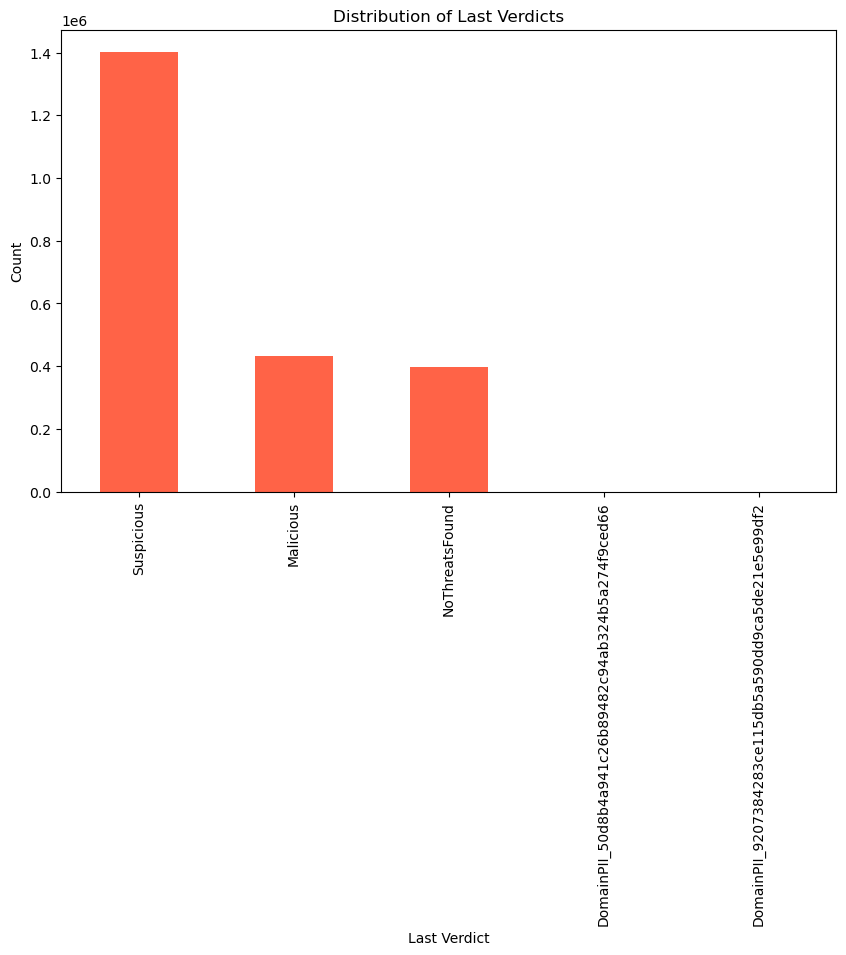

In [35]:
last_verdict_counts = df['LastVerdict'].value_counts()

# Plot the distribution of LastVerdict
plt.figure(figsize=(10, 6))
last_verdict_counts.plot(kind='bar', color='tomato')
plt.title('Distribution of Last Verdicts')
plt.xlabel('Last Verdict')
plt.ylabel('Count')
plt.show()

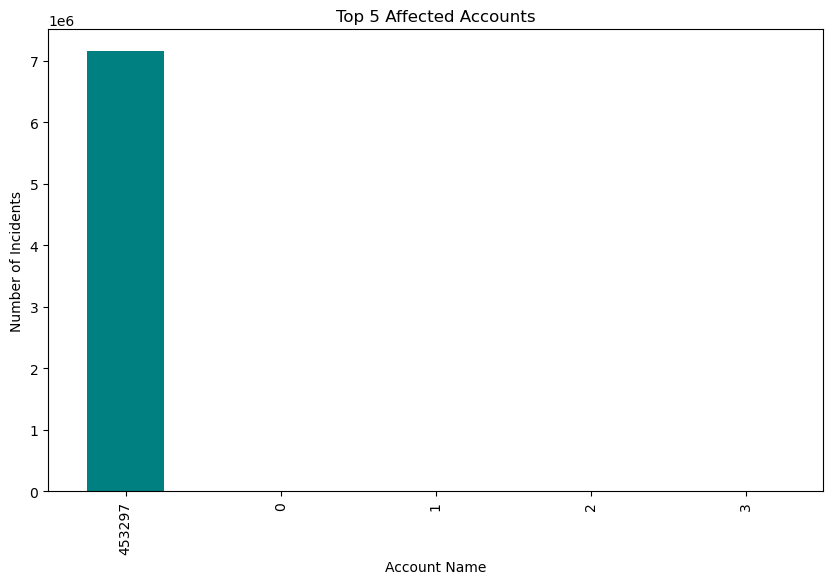

In [36]:
top_accounts = df['AccountName'].value_counts().head(5)

# Plot the top accounts
plt.figure(figsize=(10, 6))
top_accounts.plot(kind='bar', color='teal')
plt.title('Top 5 Affected Accounts')
plt.xlabel('Account Name')
plt.ylabel('Number of Incidents')
plt.show()
